In [4]:
import torch
from torch import nn
import torchvision
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from torchvision import datasets, transforms

In [1]:
!gdown 14DfvO4UU3nVyfGzmRnWGsY-MLCwryAd3
!unzip -qq Brain_Tumor_Dataset.zip

Downloading...
From: https://drive.google.com/uc?id=14DfvO4UU3nVyfGzmRnWGsY-MLCwryAd3
To: /content/Brain_Tumor_Dataset.zip
100% 1.99M/1.99M [00:00<00:00, 97.4MB/s]


In [5]:
from pathlib import Path
image_dir = Path("/content/Brain_Tumor_Dataset")
train_dir = image_dir/'Training'
test_dir = image_dir/'Testing'


train_dir, test_dir

(PosixPath('/content/Brain_Tumor_Dataset/Training'),
 PosixPath('/content/Brain_Tumor_Dataset/Testing'))

In [6]:
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 124x124
    transforms.Resize(size=(124, 124)),
    # convert images to grayscale
    transforms.Grayscale(),
    transforms.ToTensor() # Turn the image into a torch.Tensor and converts all pixel values from 0 to 255 to be between 0.0 and 1.0
])
# data_transfrom(img)

In [7]:
#Applying Transforms to the dataset
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 50
    Root location: /content/Brain_Tumor_Dataset/Training
    StandardTransform
Transform: Compose(
               Resize(size=(124, 124), interpolation=bilinear, max_size=None, antialias=True)
               Grayscale(num_output_channels=1)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 41
    Root location: /content/Brain_Tumor_Dataset/Testing
    StandardTransform
Transform: Compose(
               Resize(size=(124, 124), interpolation=bilinear, max_size=None, antialias=True)
               Grayscale(num_output_channels=1)
               ToTensor()
           )


In [8]:
# Get class names as a list
class_names = train_data.classes
class_names

['NO', 'YES']

In [9]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
train_loader = DataLoader(dataset= train_data,# _______ fill in the dataset,
                              batch_size= 64, # ___ specify the batch size to use (how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_loader = DataLoader(dataset=test_data,
                             batch_size=1,
                             num_workers=1,
                             shuffle=False) # don't usually need to shuffle testing data

train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x7d0f88613280>,
 <torch.utils.data.dataloader.DataLoader at 0x7d0f88611600>)

In [26]:
image, label = next(iter(train_loader))

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


### Exe 1.1

##### Implement a convolutional autoencoder model using PyTorch, where the encoder part consists of a convolutional layer, and the decoder part consists of a transpose convolutional layer.

Instructions:

1. Define the Model class that inherits from nn.Module and implements the convolutional and transpose convolutional layers.
2. In the forward method of the Model class, apply the convolutional layer to the input images, followed by the transpose convolutional layer.
3. Create an instance of the Model class and apply it to a batch of images from the train_loader dataset.
4. Plot the original, convolved, and de-convolved images.
5. Print the shapes of the input images, convolved images, and de-convolved images.


In [15]:
class CNN_Encoder(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_layer = nn.Conv2d(in_channels = input_shape,
                                out_channels = hidden_units,
                                kernel_size = 3, stride = 2,
                                padding = 1)

    self.deconv_layer = nn.ConvTranspose2d(in_channels = input_shape,
                                out_channels = hidden_units,
                                kernel_size = 3, stride = 2,
                                padding = 1, output_padding = 1)

  def forward(self, x):
    x = self.conv_layer(x)
    x = self.deconv_layer(x)

    return x

model_v0 = CNN_Encoder(input_shape = 1, hidden_units = 1, output_shape = 1)

In [16]:
#Applying convolution and deconvolution to image from batch
conv_image = model_v0.conv_layer(image)
deconv_image = model_v0.deconv_layer(conv_image)

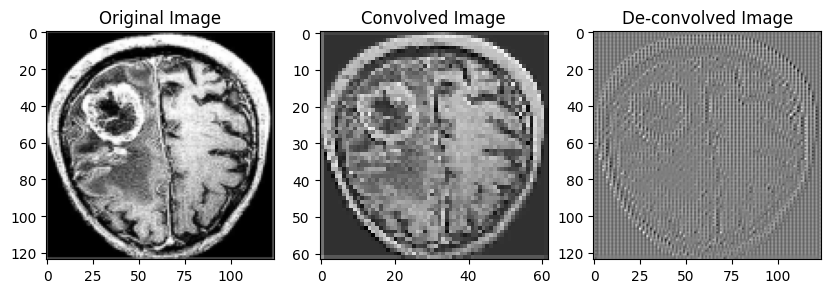

In [20]:
#Plotting Images
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image[0].squeeze(), cmap='gray')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(conv_image[0].detach().squeeze(), cmap='gray')
plt.title('Convolved Image')
plt.subplot(1, 3, 3)
plt.imshow(deconv_image[0].detach().squeeze(), cmap='gray')
plt.title('De-convolved Image')
plt.show()

In [23]:
#Printing Image Shapes
print(f'Original Image Shape : {image.detach().shape}')
print(f'Conv Image Shape: {conv_image.detach().shape}')
print(f'Deconved Image Shape: {deconv_image.detach().shape}')

print(f'Original Image Shape = Deconved Image Shape: {deconv_image.detach().shape == image.detach().shape}')

Original Image Shape : torch.Size([50, 1, 124, 124])
Conv Image Shape: torch.Size([50, 1, 62, 62])
Deconved Image Shape: torch.Size([50, 1, 124, 124])
Original Image Shape = Deconved Image Shape: True


### Exe 1.2
##### Implement a Convolutional Autoencoder Model using PyTorch

## Instructions:

1. Define the `Model` class that inherits from `nn.Module` and implements the convolutional and transpose convolutional layers.
2. In the `forward` method of the `Model` class, apply the convolutional layer to the input images, followed by the transpose convolutional layer.
3. Create an instance of the `Model` class and apply it to a batch of images from the `train_loader` dataset.
4. Plot the original, convolved, and de-convolved images using the provided code snippet.
5. Print the shapes of the input images, convolved images, and de-convolved images.


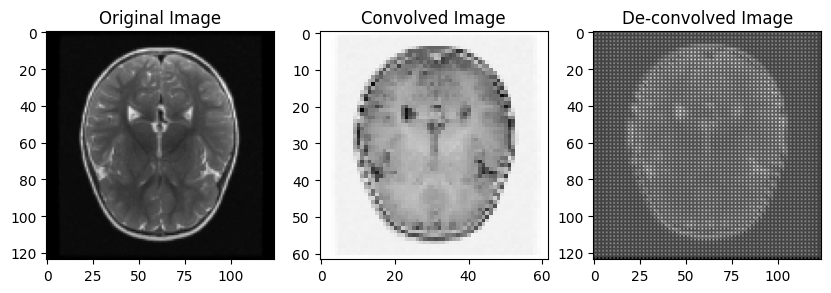

In [27]:
#Isn't this the same as the previous exercise?

class AutoEncoder_Model(nn.Module):
  def __init__(self, input_shape: int, hidden_units:int, output_shape: int):
    super().__init__()
    self.conv_layer = nn.Conv2d(in_channels = input_shape,
                                out_channels = hidden_units,
                                kernel_size = 3, stride = 2,
                                padding = 1)

    self.deconv_layer = nn.ConvTranspose2d(in_channels = input_shape,
                                out_channels = hidden_units,
                                kernel_size = 3, stride = 2,
                                padding = 1, output_padding = 1)

  def forward(self, x):
    x = self.conv_layer(x)
    x = self.deconv_layer(x)

    return x

model_v0 = CNN_Encoder(input_shape = 1, hidden_units = 1, output_shape = 1)

#Applying convolution and deconvolution to image from batch
conv_image = model_v0.conv_layer(image)
deconv_image = model_v0.deconv_layer(conv_image)

#Plotting Images
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image[0].squeeze(), cmap='gray')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(conv_image[0].detach().squeeze(), cmap='gray')
plt.title('Convolved Image')
plt.subplot(1, 3, 3)
plt.imshow(deconv_image[0].detach().squeeze(), cmap='gray')
plt.title('De-convolved Image')
plt.show()

In [ ]:
#Printing Image Shapes
print(f'Original Image Shape : {image.detach().shape}')
print(f'Conv Image Shape: {conv_image.detach().shape}')
print(f'Deconved Image Shape: {deconv_image.detach().shape}')

print(f'Original Image Shape = Deconved Image Shape: {deconv_image.detach().shape == image.detach().shape}')

### Exe 1.3

##### Implement a Convolutional Neural Network (CNN) Model with Custom Blur Kernel

## Instructions:

1. Define the custom 3x3 blur kernel/filter using the provided code snippet, with the missing values to be filled in by the student.
2. Apply the convolution filter to the input images using PyTorch's `torch.nn.functional.conv2d()` function, with the missing arguments to be filled in by the student.
3. Plot the original and convolved images.


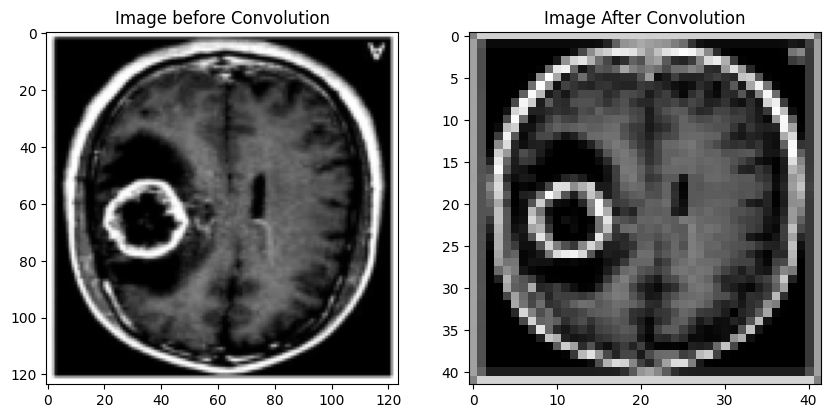

In [30]:
import torch.nn.functional as F

image, label = next(iter(train_loader))

# Define a convolution filter (3X3 blur kernel/filter)
filter = torch.tensor([[0.075, 0.05, 0.075], [0.25, 0.15, 0.25], [0.075, 0.05, 0.075]], dtype=torch.float32)
filter = filter.unsqueeze(0).unsqueeze(0)

# Apply the convolution filter to the images
conv_image = F.conv2d(image, filter, stride=3, padding=1)

# Plot the original and convolved images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image[0].squeeze(), cmap='gray')
plt.title('Image before Convolution')
plt.subplot(1, 2, 2)
plt.imshow(conv_image[0].squeeze(), cmap='gray')
plt.title('Image After Convolution')
plt.show()

### Exe 1.4

##### Extend TinyVGG Model with Additional Layers and Evaluate Performance

## Instructions:

1. Modify the `TinyVGG` class by adding at least 2 more convolutional, ReLU, and max pooling layers using PyTorch's `nn.Sequential` module.
2. Train and evaluate the modified `TinyVGG` model on a dataset of your choice.
3. Compare the performance (e.g., accuracy, loss) of the original `TinyVGG` model and the modified `TinyVGG` model on the chosen dataset.


In [33]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [139]:
# transforms for image
data_transform = transforms.Compose([
    # Resize the images to 124x124
    transforms.Resize(size=(124, 124)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0
])

In [140]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 50
    Root location: /content/Brain_Tumor_Dataset/Training
    StandardTransform
Transform: Compose(
               Resize(size=(124, 124), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 41
    Root location: /content/Brain_Tumor_Dataset/Testing
    StandardTransform
Transform: Compose(
               Resize(size=(124, 124), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [141]:
# Get class names as a list
class_names = train_data.classes
class_names

['NO', 'YES']

In [142]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=1, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=1,
                             num_workers=1,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7d0f85a1b370>,
 <torch.utils.data.dataloader.DataLoader at 0x7d0f85a19c30>)

In [143]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 124, 124]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


In [179]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels= input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1, # default
                      padding=1),
                      nn.ReLU(),
            nn.Conv2d(in_channels= hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.conv_block_3 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.conv_block_4 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
      x = self.conv_block_1(x)
      x = self.conv_block_2(x)
      x = self.conv_block_3(x)
      x = self.conv_block_4(x)
      return self.classifier(x)
torch.manual_seed(42)
model = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_3): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_4): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), pad

In [180]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [181]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [182]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [184]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 15

# Recreate an instance of TinyVGG
model = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6952 | train_acc: 0.4600 | test_loss: 0.6934 | test_acc: 0.4878
Epoch: 2 | train_loss: 0.6939 | train_acc: 0.5000 | test_loss: 0.6937 | test_acc: 0.4878
Epoch: 3 | train_loss: 0.6942 | train_acc: 0.5000 | test_loss: 0.6805 | test_acc: 0.5122
Epoch: 4 | train_loss: 0.6892 | train_acc: 0.5200 | test_loss: 0.6387 | test_acc: 0.5610
Epoch: 5 | train_loss: 0.6464 | train_acc: 0.7600 | test_loss: 0.4481 | test_acc: 0.9512
Epoch: 6 | train_loss: 0.3334 | train_acc: 0.8800 | test_loss: 0.4337 | test_acc: 0.7805
Epoch: 7 | train_loss: 0.3817 | train_acc: 0.9000 | test_loss: 0.5112 | test_acc: 0.6829
Epoch: 8 | train_loss: 0.2203 | train_acc: 0.9400 | test_loss: 0.1839 | test_acc: 0.9512
Epoch: 9 | train_loss: 0.1019 | train_acc: 0.9600 | test_loss: 0.7150 | test_acc: 0.7805
Epoch: 10 | train_loss: 0.3510 | train_acc: 0.8600 | test_loss: 0.2626 | test_acc: 0.9512
Epoch: 11 | train_loss: 0.1203 | train_acc: 0.9800 | test_loss: 0.2305 | test_acc: 0.8780
Epoch: 12 | train_l